# 0.0 IMPORTS

In [28]:
import math
import numpy as np
import pandas as pd
import inflection
import datetime as dt

import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.display import HTML
from IPython.display import Image


## 0.1 Helper Functions

## 0.2 Loading Data

In [29]:

# Lê o arquivo todo de um vez
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)

df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge, 1º arquivo de referencia, 2º arquivo anexado a referencia, left, 
# coluna que é igual nos dois datasets e serve como chave para eu fazer o merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')



# 1.0 DESCRIÇÃO DOS DADOS

In [30]:

df1 = df_raw.copy()

## 1.1 Rename Columns

In [31]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map (snakecase, cols_old))

#rename
df1.columns = cols_new


## 1.2 Data Dimensions

In [32]:
#shampe --> printa linhas e colunas de um dataframe 
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [33]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [34]:
#mundando o tipo da coluna 'date'
df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [35]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [36]:
# competition_distance 
# 
# tornar os NA em uma distancia maior que a maior distancia já encontrada no dataset
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)         

# competition_open_since_month    
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year     
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week               
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year               
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval

#dicionario que associa o mês ao nome do mês
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Ouc', 11: 'Nov', 12: 'Dec',}
 
#preenche com NA para não ter que comparar usando ISNAN, mas poderia ter feito usando ISNAN
df1['promo_interval'].fillna(0, inplace=True)


#extrai o mês da coluna data e aplica o dicionario para fazer a tradução para o nome do mes
df1['month_map'] = df1['date'].dt.month.map(month_map)

# aplica a condicional para saber se o month_map está dentro daquele intervalo para saber se a loja está ou não em promoção
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [37]:

df1.isna().sum()

df1.sample(5).T


,838092,188826,909662,856700,157256
store,398,392,608,51,42
day_of_week,1,4,7,5,4
date,2013-06-10 00:00:00,2015-02-12 00:00:00,2013-04-07 00:00:00,2013-05-24 00:00:00,2015-03-12 00:00:00
sales,4368,6681,0,5306,8607
customers,541,740,0,442,984
open,1,1,0,1,1
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,c,a,a,a,a


## 1.6 Change Types

In [38]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)




In [39]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistics

In [40]:
num_attributes = df1.select_dtypes(include=['int64', 'float64', 'int32'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'int32', 'datetime64[ns]'])

#### 1.7.1 Numerical Attributes

In [41]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

metrics


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<Axes: xlabel='competition_distance', ylabel='Count'>

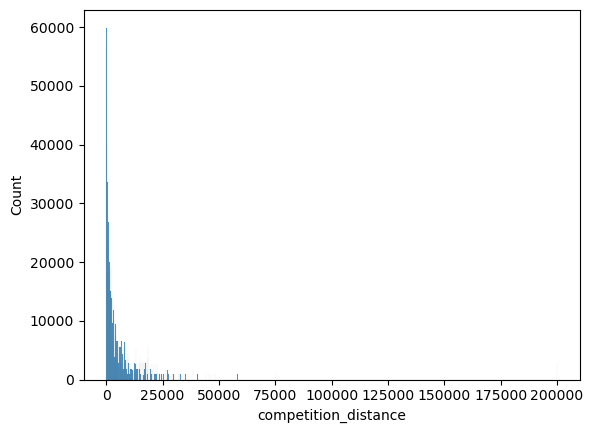

In [42]:
sns.histplot( df1['competition_distance'], kde=False )

#### 1.7.2 Categorical Attributes

In [43]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

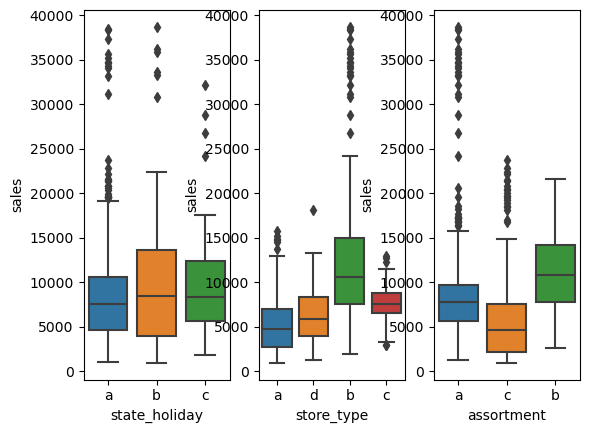

In [44]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux)

# 2.0 FEATURE ENGINEERING

In [45]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipoteses

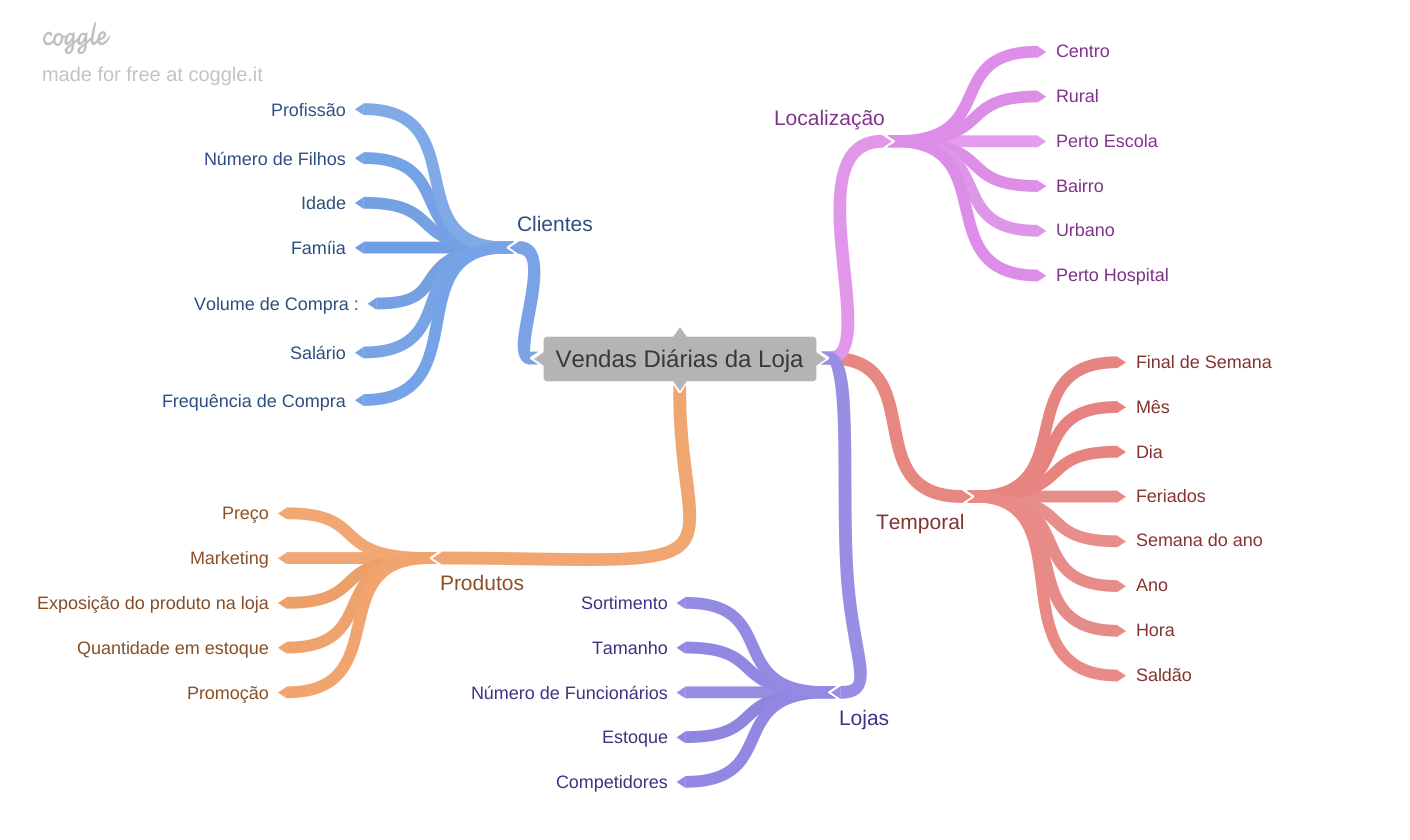

In [46]:
Image( 'img/Vendas_Dirias_da_Loja.png' )

## 2.2. Criacao das Hipoteses

#### 2.2.1. Hipoteses Loja

1. Lojas com número maior de funcionários deveriam vender mais.
2. Lojas com maior capacidade de estoque deveriam vender mais.
3. Lojas com maior porte deveriam vender mais.
4. Lojas com maior sortimentos deveriam vender mais.
5. Lojas com competidores mais próximos deveriam vender menos.
6. Lojas com competidores à mais tempo deveriam vendem mais.

#### 2.2.2. Hipoteses Produto

1. Lojas que investem mais em Marketing deveriam vender mais.
2. Lojas com maior exposição de produto deveriam vender mais.
3. Lojas com produtos com preço menor deveriam vender mais.
5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
6. Lojas com promoções ativas por mais tempo deveriam vender mais.
7. Lojas com mais dias de promoção deveriam vender mais.
8. Lojas com mais promoções consecutivas deveriam vender mais.

#### 2.2.3. Hipoteses Tempo

1. Lojas abertas durante o feriado de Natal deveriam vender mais.
2. Lojas deveriam vender mais ao longo dos anos.
3. Lojas deveriam vender mais no segundo semestre do ano.
4. Lojas deveriam vender mais depois do dia 10 de cada mês.
5. Lojas deveriam vender menos aos finais de semana.
6. Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista Final de Hipóteses

1. Lojas com maior sortimentos deveriam vender mais.
2. Lojas com competidores mais próximos deveriam vender menos.
3. Lojas com competidores à mais tempo deveriam vendem mais.
4. Lojas com promoções ativas por mais tempo deveriam vender mais.
5. Lojas com mais dias de promoção deveriam vender mais.
7. Lojas com mais promoções consecutivas deveriam vender mais.
8. Lojas abertas durante o feriado de Natal deveriam vender mais.
9. Lojas deveriam vender mais ao longo dos anos.
10. Lojas deveriam vender mais no segundo semestre do ano.
11. Lojas deveriam vender mais depois do dia 10 de cada mês.
12. Lojas deveriam vender menos aos finais de semana.
13. Lojas deveriam vender menos durante os feriados escolares.

## 2.4. Feature Engineering

In [57]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: dt.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1 )
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'] )/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: dt.datetime.strptime(x + '-1', '%Y-%W-%w') - dt.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


##### SOBRE O CÓDIGO

Esse código realiza transformações em um DataFrame chamado df2, com o objetivo de criar novas colunas que representam informações relevantes a partir de outras colunas já existentes.

As linhas de código abaixo das colunas year, month, day e week_of_year usam a função dt (datetime) para extrair essas informações a partir da coluna date, que deve ser uma coluna de data no formato datetime. A coluna week_of_year utiliza o método isocalendar() que retorna a semana do ano em que uma determinada data se encontra.

A linha de código year_week cria uma nova coluna year_week que representa o ano e semana correspondente de cada data no formato 'YYYY-WW'.

As linhas de código seguintes, competition_since e promo_since, criam novas colunas competition_since e promo_since a partir de outras colunas existentes, competition_open_since_year, competition_open_since_month, promo2_since_year e promo2_since_week. Essas colunas representam as datas em que as competições e promoções começaram, respectivamente. A função lambda é usada para criar uma nova coluna que calcula o tempo em meses ou semanas desde que a competição ou promoção começou até a data atual, dependendo da coluna.

A linha de código seguinte assortment transforma a coluna assortment em uma nova coluna assortment com os valores 'basic', 'extra' ou 'extended', dependendo do valor original da coluna.

A última linha de código, state_holiday, transforma a coluna state_holiday em uma nova coluna state_holiday com os valores 'public_holiday', 'easter_holiday', 'christmas' ou 'regular_day', dependendo do valor original da coluna.


## 3.0 FILTRAGEM DE VARIÁVEIS

In [58]:
df3 = df2.copy()

## 3.1 Filtragem das Linhas

In [60]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Selecao das Colunas

In [61]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)

##### SOBRE O CÓDIGO

A função drop() é usada para remover essas colunas do DataFrame df3. O argumento axis=1 indica que as colunas devem ser removidas (o valor padrão é axis=0, que indica que as linhas devem ser removidas).

As colunas que foram removidas são: customers, open, promo_interval e month_map.